In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np


In [4]:
# Load data from mark.txt (comma-separated values, no header)
df = pd.read_csv('marks.txt', header=None)
df.columns = ['Exam1', 'Exam2', 'Result']  # Rename columns for clarity

In [ ]:
# Convert 'Result' to binary (0 and 1)
X = df[['Exam1', 'Exam2']]
y = df['Result']

In [6]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Accuracy: 0.8
Confusion Matrix:
 [[7 1]
 [3 9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.90      0.75      0.82        12

    accuracy                           0.80        20
   macro avg       0.80      0.81      0.80        20
weighted avg       0.82      0.80      0.80        20



/home/quang/VSCODE/Python/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


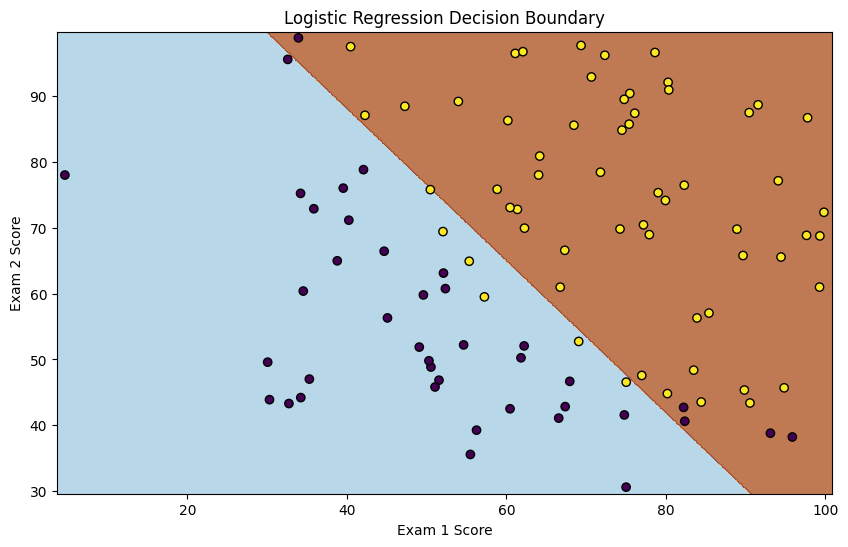

In [8]:

# Make predictions on the test set
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


# Create a mesh to plot the decision boundary
h = 0.1
x_min, x_max = X['Exam1'].min() - 1, X['Exam1'].max() + 1
y_min, y_max = X['Exam2'].min() - 1, X['Exam2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X['Exam1'], X['Exam2'], c=y, edgecolors='k')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.title('Logistic Regression Decision Boundary')
plt.show()